<a href="https://colab.research.google.com/github/brunoodon/mvp_sprintII/blob/main/MVP_Sprint_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP - Machine Learning - Sprint II**

Carregando  e imprimindo o dataset "Adult", obtido no UCI Repository. Ele representa o "Adult Census" estadunidense.

In [88]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
url = '/content/BitcoinHeistData.csv'
dataset = pd.read_csv(url).sort_values(by='year', ascending=False)
dataset.dropna(inplace=True)
display(dataset)
missings = dataset.isnull().sum()
display(missings)

,address,year,day,length,weight,count,looped,neighbors,income,label
23628,1F1tAaz5x1HUXrCNLbtMDqcw6o5GNn4xqX,2018.0,134.0,140.0,0.155440,6345.0,0.0,1.0,117832077.0,montrealRazy
11756,18JYQBHwyT62QswNfpqX5R4m88v7Q9NyPY,2018.0,273.0,2.0,0.070238,3.0,0.0,2.0,116265446.0,montrealFlyper
3641,13ungP2Hz4uvRzodDZivd6BzQCV62zoss7,2017.0,185.0,12.0,0.044054,5.0,0.0,2.0,37500000.0,princetonCerber
3654,13UPaXjNhgTZ93MZqnr3roMNM8mCwLHDcK,2017.0,264.0,4.0,1.000000,1.0,0.0,1.0,200000000.0,montrealDMALockerv3
3653,13UPaXjNhgTZ93MZqnr3roMNM8mCwLHDcK,2017.0,214.0,4.0,0.500000,1.0,0.0,1.0,300000000.0,montrealDMALockerv3
...,...,...,...,...,...,...,...,...,...,...
22233,1EH7JWaGEnqjeVK1KjWPdDBzmH8TS2F2Hr,2011.0,355.0,4.0,0.125000,1.0,0.0,2.0,83126787.0,montrealCryptoLocker
22269,1EH7JWaGEnqjeVK1KjWPdDBzmH8TS2F2Hr,2011.0,352.0,4.0,0.125000,1.0,0.0,2.0,79079849.0,montrealCryptoLocker
1579,12wQZTDmA8onM3sEt4jwcvzDxnNXxD8Vza,2011.0,340.0,2.0,0.018731,52.0,0.0,2.0,52000000.0,montrealCryptoLocker
1618,12wQZTDmA8onM3sEt4jwcvzDxnNXxD8Vza,2011.0,348.0,4.0,0.038958,17.0,17.0,2.0,55013551.0,montrealCryptoLocker


address      0
year         0
day          0
length       0
weight       0
count        0
looped       0
neighbors    0
income       0
label        0
dtype: int64

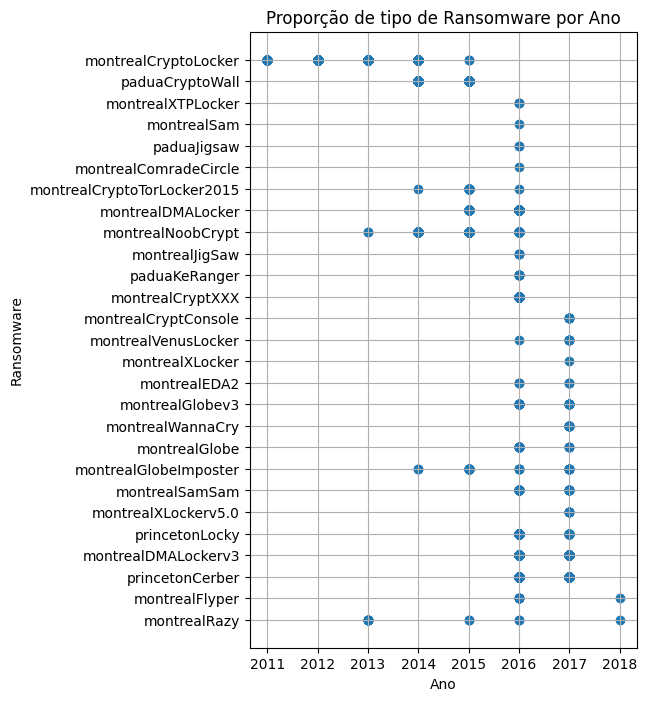

In [89]:
#Verificando a proporção de tipo de Ransomware por ano:
df = dataset[["year", "label"]]
plt.figure(figsize=(5,8))
y = df['label']
x = df['year']
plt.scatter(x, y)
#df.plot(kind='scatter', subplots=True)
plt.title("Proporção de tipo de Ransomware por Ano")
plt.xlabel("Ano")
plt.ylabel("Ransomware")
plt.grid(True)
plt.show()


In [90]:
array = dataset.values
#X = array[:,[1,3,5,11,12,13]]
X = array[:,1:8]
#X = array[:,[4]]
#padronizando os dados numéricos:
#avg = np.mean(X)
#std = np.std(X)
#X_std = (X - std) / std
#normalizando os dados, pois muitos deram números negativos:
#max = np.max(X)
#min = np.min(X)
X_norm = (X - min) / (max - min)
y = array[:,8]
X_norm_train, X_norm_test, y_train, y_test, = train_test_split(X_norm, y, test_size=0.20, random_state=7)
display(X_norm_train)

array([[0.14953201604516417, 0.014485217649680582, 0.0017827960184222255,
        ..., 0.0008171148417768534, 0.0, 0.0002971326697370376],
       [0.14953201604516417, 0.02332491457435745, 0.0, ...,
        0.00022284950230277818, 0.0, 0.00044569900460555636],
       [0.14953201604516417, 0.01730797801218244, 0.0010399643440796315,
        ..., 0.0017827960184222255, 0.0001485663348685188,
        0.0009656811766453722],
       ...,
       [0.14975486554746695, 0.0066854850690833455, 0.010696776110533353,
        ..., 0.27395632149754867, 0.0, 0.0001485663348685188],
       [0.14982914871490122, 0.013742385975337989, 0.004456990046055564,
        ..., 7.42831674342594e-05, 0.0, 0.0001485663348685188],
       [0.14975486554746695, 0.011959589956915763, 0.010696776110533353,
        ..., 0.04130144109344822, 0.0, 7.42831674342594e-05]],
      dtype=object)

Aplicando problemas de Classificação com outros datasets

LR: MSE 199977298140857565184.00 (445701089605729714176.00) - RMSE 14141332969.03
Ridge: MSE 285540866365076013056.00 (727551201537627521024.00) - RMSE 16897954502.40
Lasso: MSE 199978176224797917184.00 (445703752077168410624.00) - RMSE 14141364015.71
KNN: MSE 292043366141552951296.00 (728206887205745197056.00) - RMSE 17089276349.27
CART: MSE 294991724820554842112.00 (700834156807990935552.00) - RMSE 17175323135.84
SVM: MSE 286542062786443476992.00 (729302013266987581440.00) - RMSE 16927553360.91


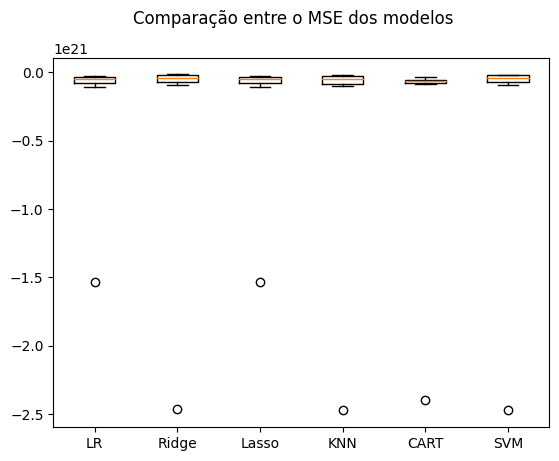

In [92]:
num_particoes = 10
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7)
np.random.seed(7)
models = []
results = []
names = []
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
#models.append(('NB', GaussianNB()))
models.append(('SVM', SVR()))


for name, model in models:
  cv_results = cross_val_score(model, X_norm_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
 # cv_results = cross_val_score(model, X_norm_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
#  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação entre o MSE dos modelos')
#fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()



In [93]:
model = DecisionTreeRegressor()
model.fit(X_norm_train, y_train)
predictions = model.predict(X_norm_test)
mse = mean_squared_error(y_test, predictions)
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))


MSE 57649014330341105664.00
RMSE 7592694800.29
